In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [82]:
df = pd.read_csv ('../input/heart.csv')

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

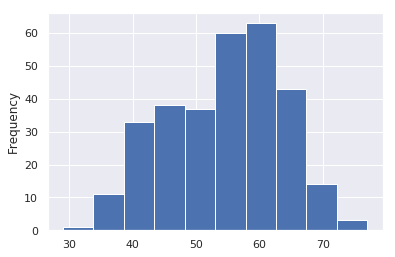

In [85]:
import seaborn as sns
sns.set()
df ['age'].plot (kind = 'hist', bins=10)

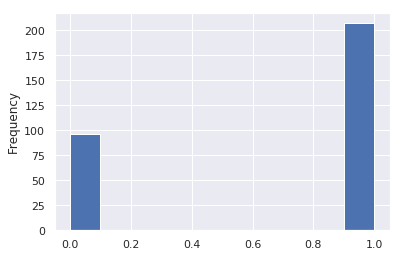

In [86]:
import seaborn as sns
sns.set()
df ['sex'].plot (kind = 'hist', bins=10)

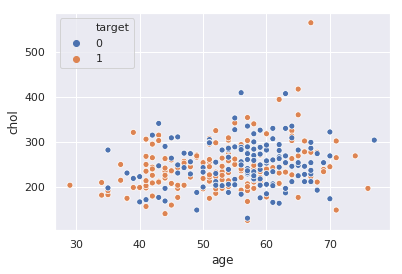

In [87]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="age", y="chol", hue="target",data=df)

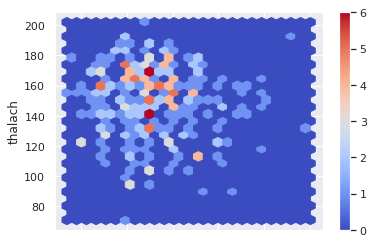

In [88]:
df.plot.hexbin(x= 'trestbps', y = 'thalach',gridsize=25,cmap = 'coolwarm')

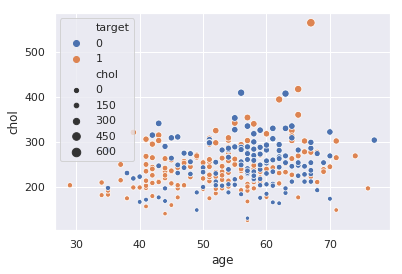

In [89]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="age", y="chol", hue="target", size = 'chol',data=df)

In [90]:
import sklearn
from sklearn.model_selection import train_test_split

In [91]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [101]:
X = df [['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca', 'thal']]

In [102]:
y= df ['target']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print (X_train.describe())
print (X_test.describe())

              age         sex     ...              ca        thal
count  242.000000  242.000000     ...      242.000000  242.000000
mean    54.462810    0.657025     ...        0.681818    2.301653
std      9.204492    0.475687     ...        0.990620    0.593811
min     29.000000    0.000000     ...        0.000000    0.000000
25%     48.000000    0.000000     ...        0.000000    2.000000
50%     55.500000    1.000000     ...        0.000000    2.000000
75%     61.000000    1.000000     ...        1.000000    3.000000
max     77.000000    1.000000     ...        4.000000    3.000000

[8 rows x 12 columns]
             age        sex    ...             ca       thal
count  61.000000  61.000000    ...      61.000000  61.000000
mean   53.983607   0.786885    ...       0.918033   2.360656
std     8.641936   0.412907    ...       1.129824   0.683930
min    34.000000   0.000000    ...       0.000000   0.000000
25%    46.000000   1.000000    ...       0.000000   2.000000
50%    55.000000 

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier (max_depth=4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
from sklearn.tree import export_graphviz
import graphviz

In [106]:
feature_name = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca', 'thal']
target_name = np.array(['No Disease','Heart Disease Presence'])

In [107]:
export_graphviz (dtree, 
                out_file = "heart_tree.dot",
                feature_names = feature_name,
                class_names =   target_name,
                 rounded = True,
                 filled = True)

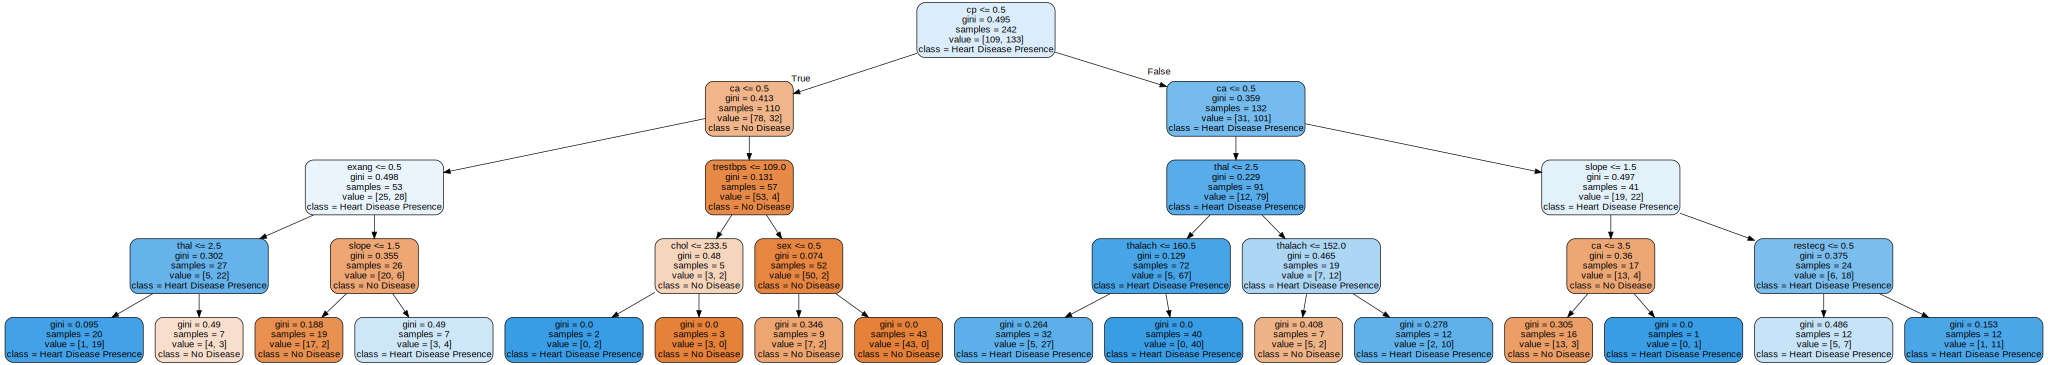

In [108]:
with open("heart_tree.dot") as heart_tree_image:
    heart_tree_graph = heart_tree_image.read()
graphviz.Source(heart_tree_graph)

In [109]:
predictions = dtree.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test,predictions))
print (confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

[[26  3]
 [ 6 26]]
